## [Decision Trees](http://www.fairlynerdy.com/Files/Cheat_Sheets/Decision_Trees_Cheat_Sheet.pdf )

Decision trees are Powerful but prone to overfitting. It uses an intuitive learning approach akin to how humans make a decision. 



## Random Forest

- Random Forest is based on Decision Trees -> many trees = a forest!
- Grows multiple trees on random subsets of the parent dataset
- At every split, a new random subset of features is chosen
    - `Heuristic is applied to know which is the best feature.`
    - This leads to "decorrelated" trees, which leads to a large increase in performance!
    
Read this for a quick overview of [Random Forest](https://medium.com/analytics-vidhya/a-primer-for-random-forests-1019c1d02bcb)



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

### Let us start with loading the data

In [2]:
diabetes = datasets.load_diabetes()
diabetes_pd = pd.DataFrame(diabetes.data)
feature_names = ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"]
diabetes_pd.columns = feature_names
diabetes_pd["y"] = diabetes.target

### Build a Decicion Tree Model

Many of the sklearn algorithms are implemented using the same standard steps: 
- **Step 1: Initiate the algorithm** Define the parameters (& hyperparameters of the algorithm) of the algorithm. For example, the maximum depth, the minimum samples in a leaf etc. (check documentation for more information)

- **Step 2: Train the algorithm** Train the algorithm by fitting it to the X_train and y_train datasets.

- **Step 3: Evaluating the algorithm** Evaluate the predictive power of the algorithm by comparing the predictive loan amount values to the true values. We can do this for the training and testing dataset.

In [3]:
def decision_tree_c(X_train, y_train, X_test, y_test):
    # Step 1: Initiating the DecisionTreeRegressor algorithm
    decision_regressor = DecisionTreeRegressor(random_state=42)
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    decision_regressor.fit(X_train, y_train)
    # step 3: Print prediction scores
    print_scores(decision_regressor, X_train, y_train, X_test, y_test, oob_score=False)
    plot_test(decision_regressor, X_train, y_train, 'train')
    plot_test(decision_regressor, X_test, y_test, 'test')

In [49]:
diabetes_pd['y'] = diabetes.target
training_df = diabetes_pd.copy()
training_df

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
def prepare_train_data(train_df, pred_var):
    """
    Given a dataframe and the predictive variable, this
    function returns train and test arrays generated using  the  
    scikit--learn split function
    """
    rf_trainRes = train_df[pred_var]
    train_df = train_df.drop(pred_var, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(train_df, rf_trainRes, test_size=0.2, random_state=42)
    
    train_df[pred_var] = rf_trainRes

    return X_train, X_test, y_train, y_test

def train_linear(X, y):
    linear_reg_all = linear_model.LinearRegression()
    linear_reg_all.fit(X_train, y_train)
    print(linear_reg_all.score(X_test, y_test))
    return linear_reg_all

def print_scores(regressor, X_train, y_train, X_test, y_test, oob_score=True):
    print("Train score: " + str(regressor.score(X_train, y_train)))
    print("Test score: " + str(regressor.score(X_test, y_test)))
    if oob_score:
        print("OOB score: " + str(regressor.oob_score_))
        
def train_linear_r(X_train, y_train, X_test, y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    model1 = regr.fit(X_train, y_train)
    
    print_scores(model1, X_train, y_train, X_test, y_test, oob_score=False)
    plot_test(model1, X_train, y_train, 'train')
    plot_test(model1, X_test, y_test, 'test')
    
def plot_test(regressor, X_test, y_test, data):
    rf_y_predicted_test = regressor.predict(X_test)
    print("Mean squared error: %d " % round(mean_squared_error(y_test, rf_y_predicted_test)))
    fig = plt.figure(figsize=(7, 7))
    plt.scatter(y_test, rf_y_predicted_test, alpha=0.5)
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title("Relationship between True Y and predicted Y* (%s dataset)" % data)
    plt.show()
    
def prepare_train_data(train_df, pred_var):
    """
    Given a dataframe and the predictive variable, this
    function returns train and test arrays generated using  the  
    scikit--learn split function
    """
    rf_trainRes = train_df[pred_var]
    train_df = train_df.drop(pred_var, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(train_df, rf_trainRes, test_size=0.2, random_state=42)
    
    train_df[pred_var] = rf_trainRes

    return X_train, X_test, y_train, y_test

Complete
Train score: 1.0
Test score: 0.058738960879898494
Mean squared error: 0 


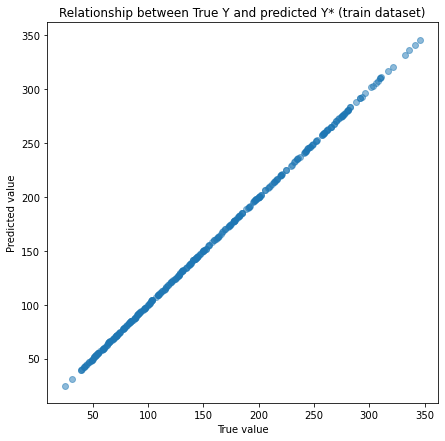

Mean squared error: 4987 


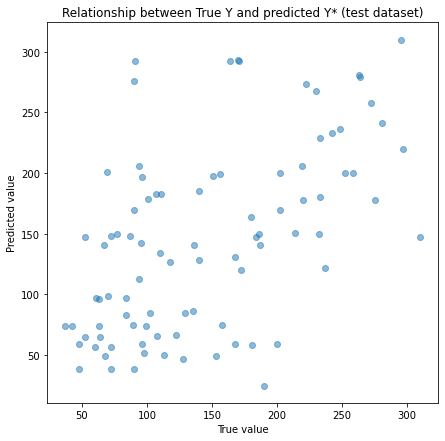

glu
Train score: 1.0
Test score: -0.14247812430152895
Mean squared error: 0 


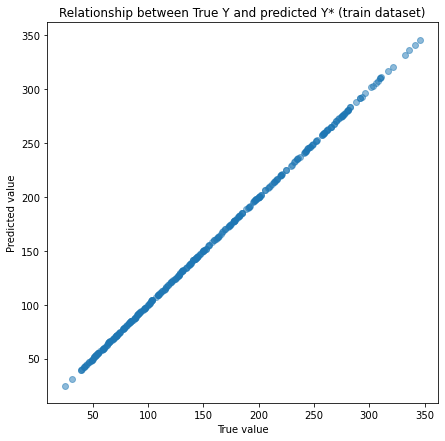

Mean squared error: 6053 


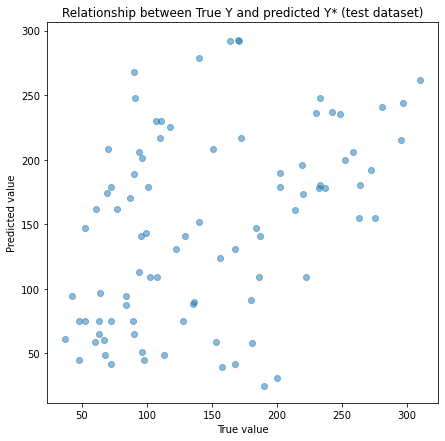

ltg
Train score: 1.0
Test score: -0.1137337353032144
Mean squared error: 0 


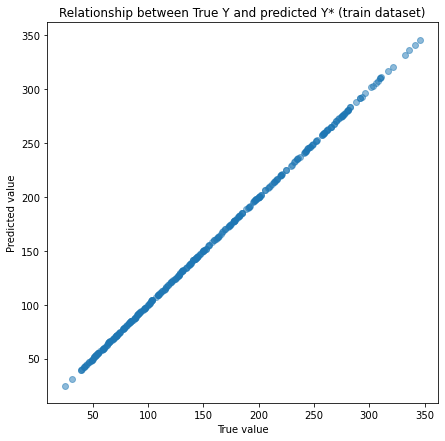

Mean squared error: 5901 


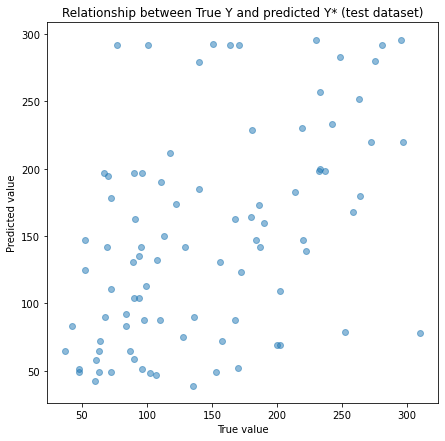

tch
Train score: 1.0
Test score: -0.10596337664231559
Mean squared error: 0 


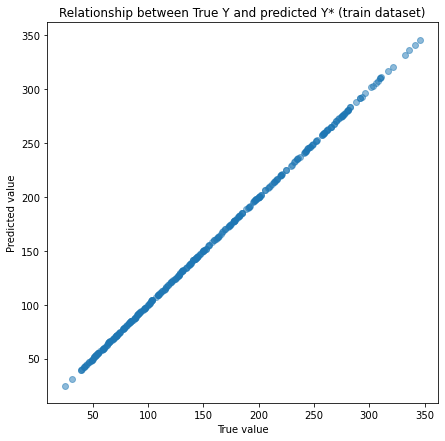

Mean squared error: 5860 


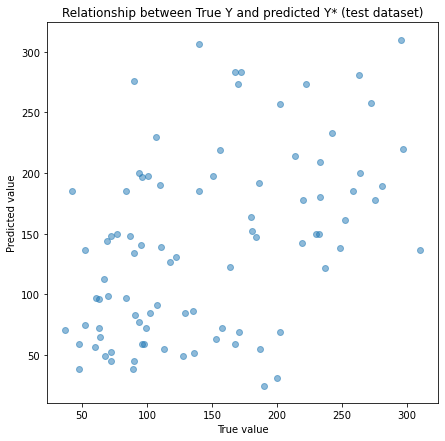

hdl
Train score: 1.0
Test score: 0.11009882606812171
Mean squared error: 0 


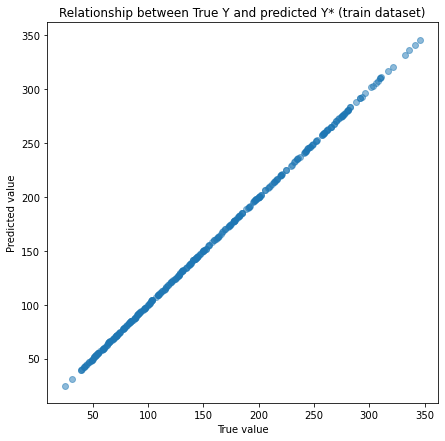

Mean squared error: 4715 


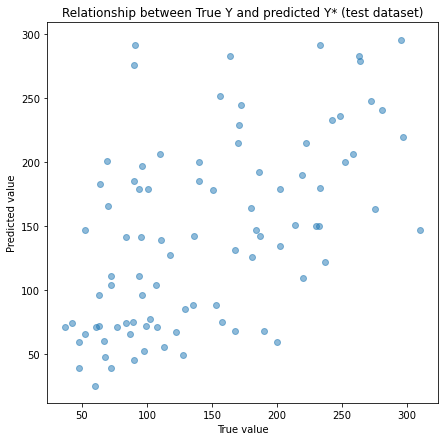

ldl
Train score: 1.0
Test score: -0.010793448894908408
Mean squared error: 0 


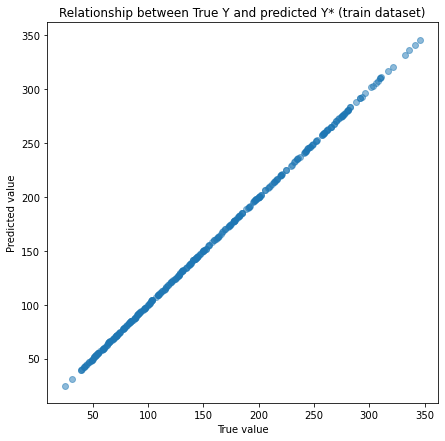

Mean squared error: 5355 


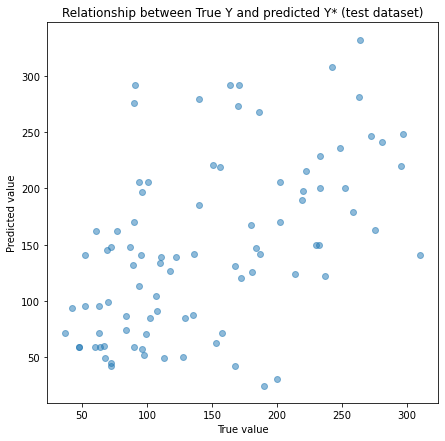

tc
Train score: 1.0
Test score: 0.17657102090087706
Mean squared error: 0 


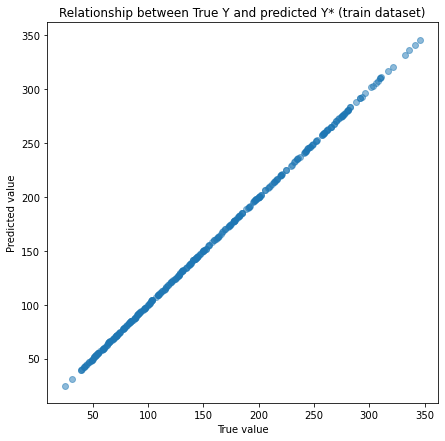

Mean squared error: 4363 


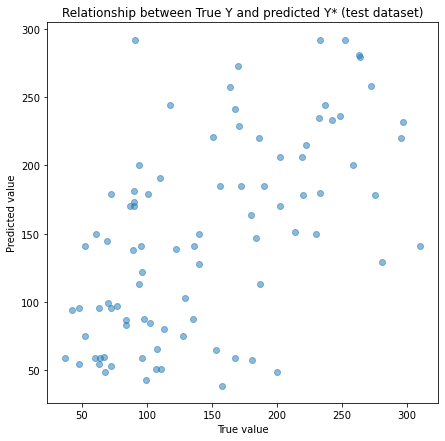

map
Train score: 1.0
Test score: 0.25410070756166914
Mean squared error: 0 


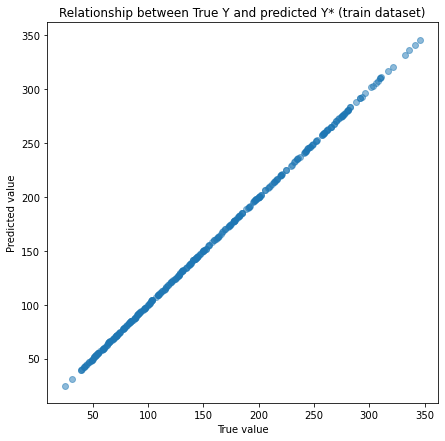

Mean squared error: 3952 


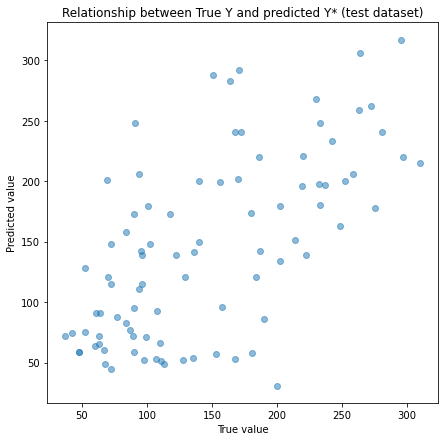

bmi
Train score: 1.0
Test score: -0.3383403635171347
Mean squared error: 0 


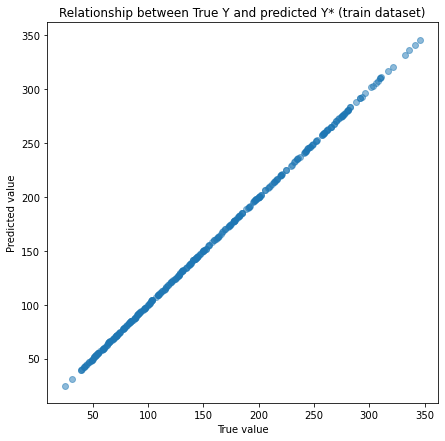

Mean squared error: 7091 


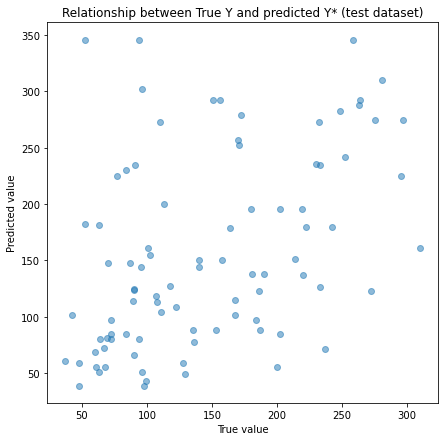

sex
Train score: 1.0
Test score: 0.11251221803212363
Mean squared error: 0 


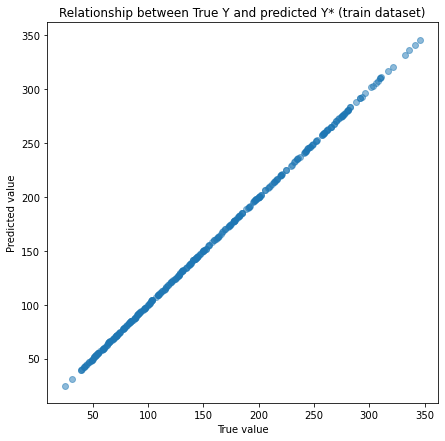

Mean squared error: 4702 


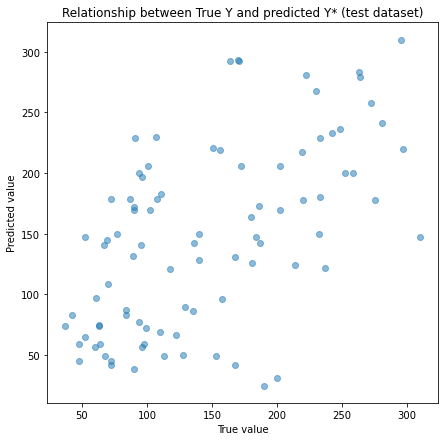

age
Train score: 1.0
Test score: 0.1082113754108619
Mean squared error: 0 


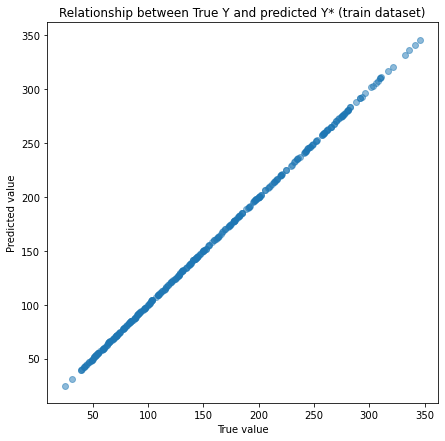

Mean squared error: 4725 


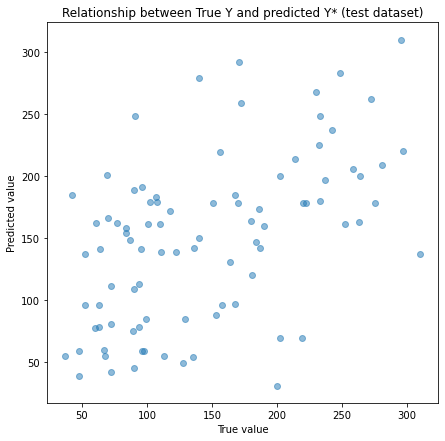

In [50]:
feat_columns = training_df.columns
feat_columns = list(feat_columns)
X_train, X_test, y_train, y_test = prepare_train_data(training_df, 'y')
print("Complete")
complete = decision_tree_c(X_train,y_train, X_test, y_test)
test_list = []
for feat in feat_columns:
    poped = feat_columns.pop()
    if poped == 'y':
        feat_columns.insert(0,poped)
        continue
    else:
        print(poped)
        training_df_2 = training_df[feat_columns]
        X_train, X_test, y_train, y_test = prepare_train_data(training_df_2, 'y')
        test = decision_tree_c(X_train,y_train,X_test, y_test)
        test_list.append((poped,test))
        feat_columns.insert(0,poped)
        
#feat_importance = pd.DataFrame(test_list)
#feat_importance['importance'] = complete - feat_importance[1]
#feat_importance.columns = [['feature', 'auPRC','importance']]
#feat_importance.sort_values(by='importance', ascending=False)

Train score: 1.0
Test score: 0.1082113754108619
Mean squared error: 0 


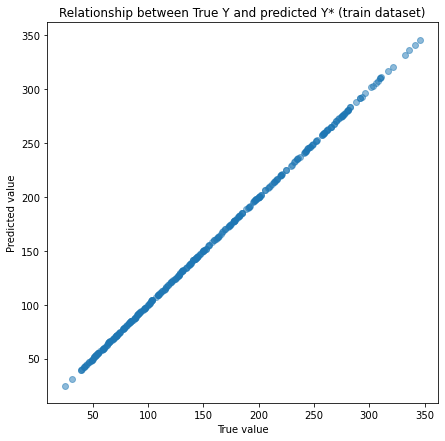

Mean squared error: 4725 


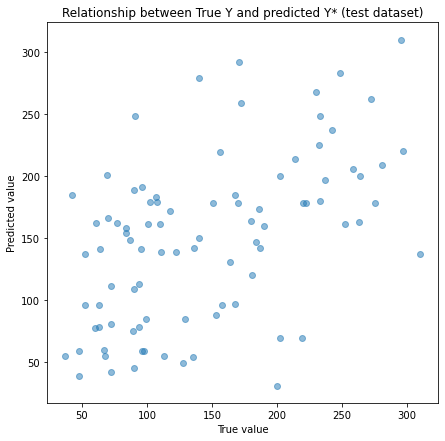

In [7]:
decision_tree_c(X_train, y_train, X_test, y_test)

## How can we improve on the performance of Decision Trees and Reduce overfitting?

In [8]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
    regressor = sklearn_regressor(**model_parameters)
    
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    regressor.fit(X_train, y_train)
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    training_score = regressor.score(X_train, y_train)
    testing_score = regressor.score(X_test, y_test)
    
    # Print the results!
    print(f"Train score: {training_score:>5.4f}")
    print(f"Test score: {testing_score:>7.4f}")
    if print_oob_score:
        print(f"OOB score: {regressor.oob_score_:>8.4f}")
        
    return regressor

### Hyper-paramter tunning

Since the tree is overfitting, we need to use some of the strategies learnt in class, and aim to reduce them. To reduce the variance, we constrain the model using some of the provided parameters for example:
- Criterion (Cost function used to measure the purity of a split)
- Maximum depth of the tree
- Minimum samples for each node split
- Minimum samples for each terminal node
- Maximum number of terminal nodes

See this [useful blog](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#four) for a refresher on decision tree parameters.

In [9]:
# Define the model parameters 
# We are fixing the random state so that the results are reproducible and consistent.
hyper_parameters = {"max_depth":8,
              'random_state':4,
              'min_samples_split':3
             }

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=hyper_parameters)

Train score: 0.8618
Test score:  0.1687


## Using GridSearch to determine the best parameters

In [42]:
# Set parameters to search through - known as parameter grid
parameters = {'max_depth':[4, 8,10,14], 
              'min_impurity_decrease': [.1,.01, 0.0],
              #'max_features': [3, 5,7],
              'min_samples_split': [10, 5, 50, 2, 20]}
# Initialize model
decision_regressor= DecisionTreeRegressor(random_state=42)

# Initialize GridSearch and then fit
regressor = GridSearchCV(decision_regressor, parameters)
regressor.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 8, 10, 14],
                         'min_impurity_decrease': [0.1, 0.01, 0.0],
                         'min_samples_split': [10, 5, 50, 2, 20]})

#### We can see that the search yielded some parameters we can use

In [43]:
# Print out what GridSearchCV found to be the best parameters 
regressor.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.1,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

#### Now let us use the parameters and see if we have reduced overfitting

In [44]:
# Evaluate the tuned model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=regressor.best_estimator_.get_params())

Train score: 0.5405
Test score:  0.3483


#### We can observe an improved test score, although the model's perfomance is still poor. 

Overfitting has been eliminated. Now we need to figure out otehr ways of improving the model accuracy. How about exploring a combination of parameter tunning and feature selection?

#### Since we are using decision trees, we can easily extract information about the contributions of each feature to the tree

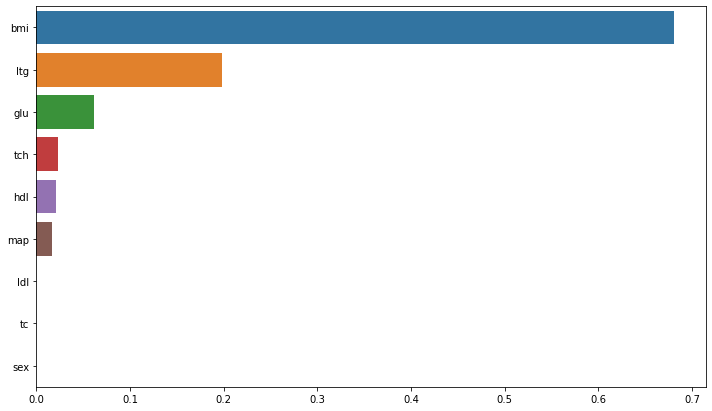

In [45]:
# Get the feature importances from our final trained model...
importances = trained_regressor.feature_importances_

# Find the indices of the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting a bar chart of feature importances in descending order
plt.figure(figsize=(12,7))
sns.barplot(y=X_train.columns[indices],x=importances[indices]);

## 3. Bagging
<a id='bagging'></a>

As Decision Trees naturally overfit to the data, better performance is achieved when an **ensemble approach** such as Bagging is used.

Bagging is a shorter term for Bootstrapping Aggregation which is a general procedure to reduce variance in models that have a tendancy to overfit.

[Bagging](https://www.ibm.com/cloud/learn/bagging)


[Great tutorial on bagging and Boosting](https://towardsdatascience.com/ensemble-learning-bagging-boosting-3098079e5422)

As an ensemble method, bagging does the following:
- Creates N random subsamples of the dataset using selection with replacement. (Statistically 1/3 of the data is left of each subsample)
- Trains a new decision tree on each N subsample
- Takes the prediction from each and every N tree and averages the result
- This average is the final output of the bagging model. 

This **Ensemble approach** uses the results of several random analyses to find an average response.

For each tree, there will be a sample of data which was not used to train the algorithm. This means that we can also measure the **out-of-bag** score ( or **oob_score**). This score evaluates the performance of the model on the sample not used while training an individual tree. (On average, a random ~1/3 of data are not used to train a given tree).

In [46]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# For simplicity, we are going to use as base estimator a Decision Tree with fixed parameters
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:
# base_estimator = DecisionTree
# n_estimators = 5 : it's gonna be created 5 subsets to train 5 Decision Tree models
# max_samples = 50 : it's gonna be taken randomly 50 items with replacement
# bootstrap = True : means that the sampling is gonna be with replacement
bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

Train score: 0.9389671361502347
Test score: 0.9440559440559441


## 4. Build a Random Forest
<a id='randomforest'></a>

Even with Bagging, the decision trees can be largely correlated. This is because given subsets from the same dataset, the trees are probably going to split on the same features and result in very similar predictions.

To de-correlate the trees, we use a Random Forest Regressor, which at each split, only consider a random subsample of the features! This means that the trees are forced to make different split decisions and results in less correlated trees.

**A Random Forest is essentially bagged decision trees where each decision tree only considers a random subset of the features at each split**

In [52]:
# Check how many columns our dataset has...
print(f"Number of features =  {X_train.shape[1]}")
num_features = X_train.shape[1]

Number of features =  9


In [53]:
# define the parameters
parameters = {"oob_score": True, 
              "n_estimators": 50, 
              "max_features": num_features, 
              'random_state': 42}

trained_regressor = train_score_regressor(sklearn_regressor=RandomForestRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters,
                                          print_oob_score=True)

Train score: 0.9223
Test score:  0.4372
OOB score:   0.4273


In [54]:
# Plot a graph of the true values vs the predicted values for the training and test datasets
def plot_y_yhat_scatter(y_actual,y_predicted,train_test):
    ax = sns.regplot(x=y_actual, y=y_predicted, fit_reg=False)   
    ax.set_xlabel('true values')
    ax.set_ylabel('predicted values')
    ax.set_title('Relationship between true and predicted loan amounts: '+train_test+' results')
    pass

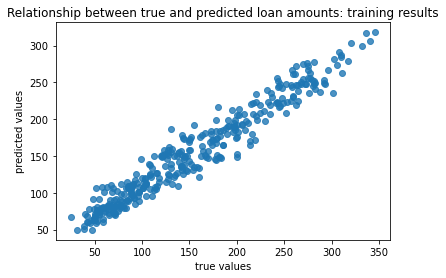

In [55]:
plot_y_yhat_scatter(y_train, trained_regressor.predict(X_train),train_test="training")

#In this kind of graphics could be nice to add a reference line binding all the perfect predictions points

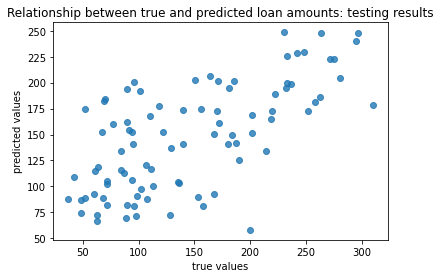

In [19]:
plot_y_yhat_scatter(y_test, trained_regressor.predict(X_test),train_test="testing")

In [56]:
# define parameters
parameters = {'max_depth':[7,10,15], 
              'n_estimators': [10, 50,100,200]}
# initialize model
rf_regressor= RandomForestRegressor(n_jobs=-1, random_state=42)
# initialize grid search and fit
regressor = GridSearchCV(rf_regressor, parameters)
regressor.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [7, 10, 15],
                         'n_estimators': [10, 50, 100, 200]})

In [57]:
# Take the best parameters from grid search and fit a model
parameters = regressor.best_estimator_.get_params()
trained_regressor = train_score_regressor(sklearn_regressor=RandomForestRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters,
                                          print_oob_score=False)

Train score: 0.8465
Test score:  0.4543


In [67]:
trained_regressor.feature_importances_

array([0.0080305 , 0.38623132, 0.09287231, 0.05053225, 0.06201273,
       0.04807416, 0.02369595, 0.25839651, 0.07015427])

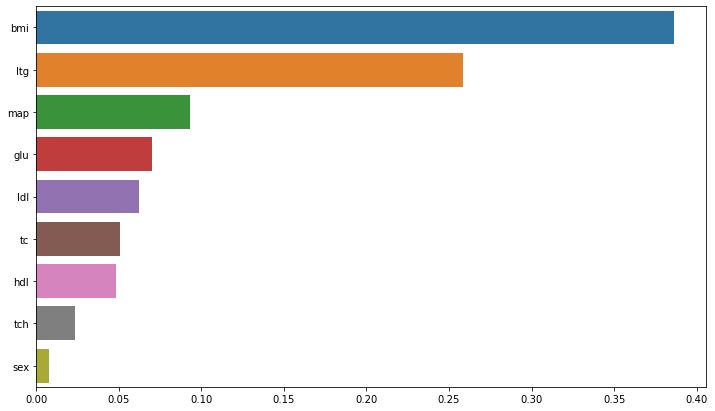

In [68]:
# Get the feature importances from our final trained model...
importances = trained_regressor.feature_importances_

# Find the indices of the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting a bar chart of feature importances in descending order
plt.figure(figsize=(12,7))
sns.barplot(y=X_train.columns[indices],
            x=importances[indices]);

### How else can we improve on the model?